# Исследование объявлений о продаже квартир

**Описание проекта**

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования**
- научиться определять рыночную стоимость объектов недвижимости
- установить параметры для построения автоматизированной системы, которая отследит аномалии и мошенническую деятельность.
- выявить факторы, влияющие на ценообразование объектов недвижимости.

***Ход исследования***

Данные для исследования получим из файла `/datasets/real_estate_data.csv`, документация имеется, однако обязательно нужно проверить данные на предмет аномальных значений и пропусков, которые могут повлиять на результаты исследования.
Проведем предварительную обработку и исследовательский анализ данных и поправим все ошибки, которые могут привести к искажению конечного результата.

Разделим все наше исследование на следующие этапы:

- изучение предоставленной выгрузки данных
- предобработка данных
- добавление в таблицу столбцов, необходимых для расчётов
- проведение исследования данных для Ленинградской области
- проведение исследования данных для Санкт-Петербурга
- выявление факторов, влияющих на ценообразование объектов недвижимости
- написание общего вывода

## Откройте файл с данными и изучите общую информацию

In [1]:
# импортируем нужные нам библиотеки для анализа данных
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# читаем файл, в качестве разделителя пишем '\t', чтобы данные не образовали единую строчку
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('C:/Users/etols/Downloads/real_estate_data.csv', sep = '\t')

**Описание данных в столбцах:**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [3]:
# с помощью метода info изучим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# выведем на экран первые 20 строк таблицы для наглядности
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
# немного изучим данные, для удобства изучения информации поменяем строки и столбцы местами с помощью атрибута T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


<div style="background-color:Azure; color:#black; padding:2%">

**Что можно сказать по данным:**
1. В столбце `last_price` очень сильный разброс данных, самая минимальная стоимость 12 190 р (даже аренда одной комнаты в месяц стоит больше сейчас), а самая максимальная стоимость 763 000 000 р (фантастическая цифра, похоже на выброс в данных, интересно, сколько таких строк?)
2. В столбце `ceiling_height` минимальная высота потолка 1 м (что за каморка, возможно ли это?) и максимальная 100 м (аномально высокий потолок, не повлияет ли это на средние значения?)
3. В столбце `ceiling_height` очень много пропусков в данных, число строк с заполненными данными практически в два раза меньше общего количества строк
4. В столбце `rooms` минимальное количество комнат 0, что имеется в виду? Вероятно это квартиры-студии.
5. В столбце `living_area` минимальная жилая площадь 2м², даже площадь туалета больше, возможно данные придется удалить
6. В столбце `kitchen_area` минимальная площадь 1.3м², еще меньше, чем предыдущее значение, возможно данные придется удалить
7. В столбце `airports_nearest` минимальное значение 0, квартира в аэропорту находиться не может, нужно проверить данные

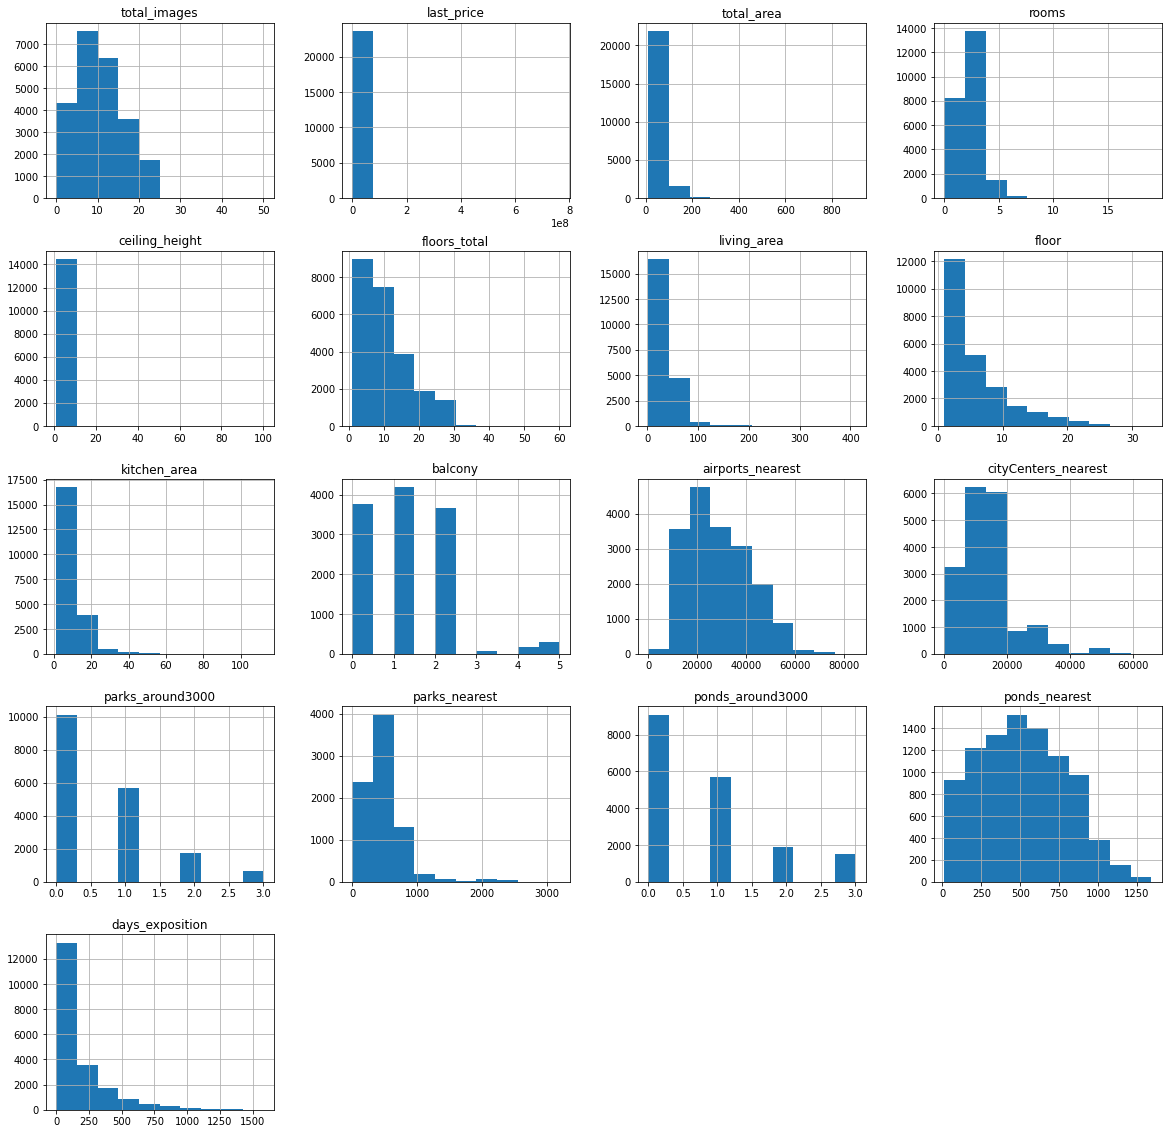

In [6]:
# построим гистограмму для всех числовых столбцов таблицы на одном графике
data.hist(figsize = (20,20))
plt.show()

## Выполните предобработку данных

### Удаление пропусков

In [7]:
# с помощью метода isna найдем, в каких столбцах есть пропущенные значения и сразу посчитаем их
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div style="background-color:Azure; color:#black; padding:2%">

**В каких столбцах точно можно заменить пропуски?**
- в столбце `is_apartment` (является ли квартира апартаментами) логично предположить, что пропуски по той причине, что квартира апартами не является, значит можно заменить на False.
- ровно также как и в столбце `balcony` (число балконов), если не указано количество, скорее всего в квартире их нет, можно заменить значения на 0.
- в столбцах `parks_around3000` и `ponds_around3000` можно предположить, что пропуск возник по той причине, что ни парка, ни пруда рядом с квартирой в радиусе 3 км нет, значит можно заменить на 0.
- про столбец `days_exposition` надо подумать, можно ли заменить эти пропуски медианным значением.

In [8]:
# заменим пропуски в столбце is apartment
data['is_apartment'] = data['is_apartment'].fillna('False')

In [9]:
# сразу проверим количество пропусков
data['is_apartment'].isna().sum()

0

In [10]:
# заменим пропуски в столбцах
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [11]:
# сразу проверим количество пропусков в столбцах
data['balcony'].isna().sum()
data['parks_around3000'].isna().sum()
data['ponds_around3000'].isna().sum()

0

In [12]:
# в столбце floors_total менее 1 процента пропущенных данных от общего количества значений, удалим их
data['floors_total'].dropna(inplace=True)

In [13]:
# в столбце locality_name также менее 1 процента пропусков от общего количества значений, удалим их
data['locality_name'].dropna(inplace=True)

<div style="background-color:Azure; color:#black; padding:2%">

**Причины появления пропусков:**
- пропуски в столбце `ceiling_height` могли возникнуть по причине того, что пользователи могли пропустить при ручном вводе эти ячейки, либо при выгрузке данных что-то пошло не так
- пропуски в столбце `floors_total`, судя по их количеству, точно были сделаны во время ручного заполнения объявления
- пропуски в столбцах `living_area` и `kitchen_area` сделаны во время ручного заполнения пользователем, намеренно или случайно, либо при выгрузке данных сломался формат
- пропуски в столбце `is_apartment` судя по всему из-за того, что если квартира не является апартаментами, пользователь просто при заполнении оставлял поле пустым, а не писал, например, "нет"
- пропуски в столбце `balcony` скорее всего по аналогичной причине, что и в строке выше - если поле оставлено пустым, скорее всего просто в данной квартире балкона не имеется
- пропуски в столбцах `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` могли возникнуть по причине некорректного определения геолокации при внесении данных по конкретной квартире
- пропуски в столбце `days_exposition` скорее всего образовались при выгрузке данных.

### Преобразование типов данных

<div style="background-color:Azure; color:#black; padding:2%">

**Какие данные необходимо будет преобразовать в другие типы данных:**
- столбец `first day exposition` имеет тип данных object, преобразовать в объект datetime
- столбец `floors_total`, содержит количество этажей и должно быть целым числом, преобразовать в тип данных int64
- столбец `balcony`, содержит количество балконов и должно быть целым числом, преобразовать в тип данных int64
- столбец `is_apartment` в описании данных должно быть булевым типом, преобразовать в тип данных bool
- столбец `parks_around3000`, содержит количество парков и должно быть целым числом, преобразовать в тип данных int64
- столбец `ponds_around3000`, содержит количество водоёмов и должно быть целым числом, преобразовать в тип данных int64
- столбец `days_exposition`, содержит количество дней размещения объявления, преобразовать в тип данных int64

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
# data['floors_total'] = data['floors_total'].astype('int') - есть пропуски, поэтому не получится преобразовать тип данных
data['balcony'] = data['balcony'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
# тип данных в столбце 'days_exposition' преобразовать не получится, поскольку есть пропущенные значения

In [15]:
# переименуем столбец cityCenters_nearest в snake_case
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}, inplace = True)

<div style="background-color:Azure; color:#black; padding:2%">

**Почему нужно изменять типы данных:**
- в столбце `first day exposition` содержатся данные о дате, поэтому для удобства и верных расчетов в дальнейшем нужно преобразовать данные в этом столбце в тип datetime
- в столбцах `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` содержатся целочисленные данные, количество этажей, балконов, парков, прудов или дней не может быть дробным числом, поэтому преобразуем тип данных в integer.
- в столбце `is_apartment` содержатся булевы значения, true или false, соответственно преобразуем его в тип данных bool. Если бы в заполненных данных были числа, которые тоже могут обозначать истину или ложь, т.е. 1 или 0 соответственно, то можно было бы преобразовать в целые числа.

In [16]:
# выведем еще раз сведения о датафрейме, проверим преобразование данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Удаление дубликатов

In [17]:
# на всякий случай посчитаем количество явных дубликатов
data.duplicated().sum()

0

In [18]:
# посчитаем количество уникальных данных в столбце с названиями locality_name
data['locality_name'].nunique()

364

In [19]:
# выведем уникальные значения в столбце с названиями и изучим данные
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

<div style="background-color:Azure; color:#black; padding:2%">
    
**Какие неявные дубликаты мы можем видеть в столбце locality_name:**
- посёлок и поселок - заменим на поселок
- городской посёлок и посёлок городского типа (похоже, что это одно и то же) - заменим на поселок городского типа

In [20]:
# избавимся от разных написаний одного и того же населенного пункта
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской посёлок', 'посёлок городского типа'], 'поселок городского типа', regex = True)
)

In [21]:
# еще раз выведем количество уникальных значений
data['locality_name'].nunique()

330

In [22]:
# выведем список уникальных значений
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

<div style="background-color:Azure; color:#black; padding:2%">

***ВЫВОД***
    
В ходе изучения предоставленной выборки данных мы выявили, что в некоторых столбцах отсутствуют данные, причем в таких столбцах, например, как `is_apartment`, `balcony`, `parks_around3000` и `ponds_around3000` можно заполнить пропуски, руководствуясь логикой. Однако, например, есть столбцы, в которых пропуски лучше не заполнять, например, в столбце `locality_name`.

Некоторые столбцы требуют преобразования типа данных, по крайней мере в тех столбцах, где отсутствуют пропуски.
    
В исходных данных нет явных дубликатов, названия всех столбцов написаны практически единообразно, однако потребовались всё же незначительные видоизменения (например, посёлок в поселок).
    
Также в некоторых столбцах при взгляде на описательную статистику появились сомнения в правильности предоставленных данных. Это такие столбцы, как `last_price` (очень большой разброс минимального и максимального значения, а также достаточно сильно различаются среднее значение и медиана), столбец `ceiling_height` (также большая разница между минимальным и максимальным значениями), столбцы `living_area` и `kitchen_area` (очень малое значение минимальной площади, нужно изучить подробнее).

## Добавьте в таблицу новые столбцы со следующими параметрами

- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из _м_ в _км_ и округлите до ближайших целых значений).

In [23]:
# добавим столбец с ценой одного квадратного метра
data['price_per_m2'] = (data['last_price'] / data['total_area']).round(2)

In [24]:
# добавим столбец с днем недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# добавим столбец с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

# добавим столбец с годом публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [25]:
# добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой») с помощью функции
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

In [26]:
# проверим, как сработала функция, выведем уникальные значения нового столбца
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [27]:
# добавим столбец с расстоянием до центра города в километрах
data['city_centers_km'] = (data['city_centers_nearest'] / 1000).round()

In [28]:
# проверим, что там у нас по добавленным столбцам
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_km
23694,9,9700000.0,133.81,2017-03-21,3,3.7,5.0,73.3,3,True,...,796.0,3,381.0,NaN,72490.85,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,True,...,NaN,0,NaN,45.0,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,True,...,NaN,0,NaN,NaN,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.0,17.0,NaN,12,True,...,173.0,3,196.0,602.0,149511.40,1,3,2017,другой,10.0
23698,4,1350000.0,32.30,2017-07-21,1,2.5,5.0,12.3,1,True,...,NaN,0,NaN,NaN,41795.67,4,7,2017,первый,NaN


## Проведите исследовательский анализ данных

### Построение гистограмм для параметров объектов недвижимости

**Список параметров:**
- общая площадь
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолков
- тип этажа квартиры («первый», «последний», «другой»)
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего парка

**Общая площадь**

In [29]:
# изучим данные в столбце с общей площадью квартир
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

***Судя по разницам среднего, медианного значения и максимальной общей площади квартир, нужно подробнее посмотреть, какие именно значения скорее всего являются выбросами. Понятное дело, что максимальное значение 900 м² скорее всего проставлено некорректно. Нагляднее всего это можно сделать с помощью диаграммы размаха.***

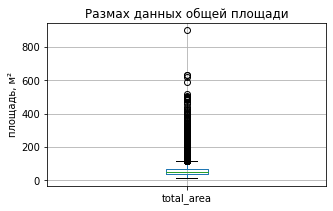

In [30]:
# изучим подробнее, какие именно значения являются выбросами
data.boxplot(column='total_area', figsize=(5,3))
plt.title('Размах данных общей площади')
plt.ylabel('площадь, м²')
plt.show()

***Граница верхнего уса находится примерно на значении 150, рассмотрим еще подробнее.***

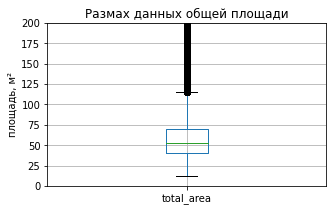

In [31]:
# добавим границу вертикальной оси y
data.boxplot(column='total_area', figsize=(5,3))
plt.title('Размах данных общей площади')
plt.ylabel('площадь, м²')
plt.ylim(0,200)
plt.show()

***Примерно после значения 120 м² данные сливаются в одну жирную линию, очень много таких выбросов. Поэтому при построении гистограммы в качестве нижней границы возьмем минимальное значение (12 м²), а в качестве верхней границы возьмем 120 м².***

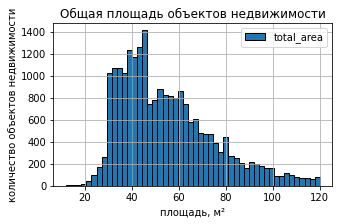

In [32]:
# собственно говоря, теперь мы можем построить гистограмму
data['total_area'].hist(bins=50, range=(12,120), edgecolor = 'black', legend=True, figsize=(5,3))
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('площадь, м²')
plt.ylabel('количество объектов недвижимости')
plt.show()

***Из гистограммы мы видим, что самый распространённый вариант недвижимости в объявлениях имеет площадь примерно 45 м². Самые редкие варианты - менее 29 м² примерно, а также на спад идет количество объявлений о продаже квартир с площадью более 80 м². Наиболее распространена выборка квартир с площадью от 30 м² до 68 м².***

***Среднее значение - 60 м², медианное значение - 52 м².***

**Жилая площадь**

In [33]:
# изучим данные в столбце с жилой площадью квартир
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

***Аналогично данных по общей площади, опять видим очень большое максимальное значение (409 м²). Проверим данные на предмет выбросов с помощью диаграммы размаха.***

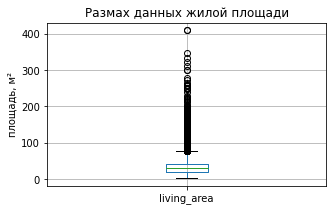

In [34]:
# поищем и здесь выбросы
data.boxplot(column='living_area', figsize=(5,3))
plt.title('Размах данных жилой площади')
plt.ylabel('площадь, м²')
plt.show()

***Примерно после значения площади 90 м², верхней границы "уса", данные исключим как выбросы, гистограмму будем строить с верхним значением в 90 м². Минимальную границу все же оставим равной минимальному значению.***

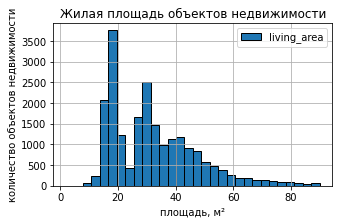

In [35]:
# строим гистограмму по данным жилой площади
data['living_area'].hist(bins=30, range=(2,90), edgecolor='black', legend=True, figsize=(5,3))
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('площадь, м²')
plt.ylabel('количество объектов недвижимости')
plt.show()

***Из гистограммы мы видим, что самый распространённый вариант недвижимости в объявлениях имеет жилую площадь в диапазоне примерно от 18 м² до 20 м². Также достаточно часто встречающийся вариант - 30 м². Самые редкие варианты - менее 16 м² примерно, а также довольно редко встречаются объявления о продаже квартир с жилой площадью более 42 м².***

***Среднее значение - 35 м², медианное значение - 30 м², что в принципе подтверждается графиком.***

**Площадь кухни**

In [36]:
# изучим данные в столбце с жилой площадью квартир
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

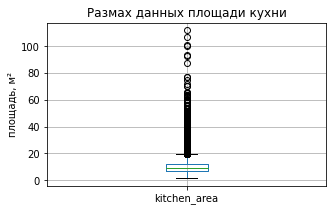

In [37]:
# исследуем данные на предмет выбросов
data.boxplot(column='kitchen_area', figsize=(5,3))
plt.title('Размах данных площади кухни')
plt.ylabel('площадь, м²')
plt.show()

***Примерно после 19 м² данные исключим как выбросы, гистограмму будем строить с верхним значением в 19 м². Минимальную границу оставим примерно минимальному значению, возьмем 2 м².***

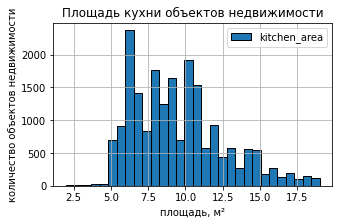

In [38]:
# строим гистограмму
data['kitchen_area'].hist(bins=30, range=(2,19), edgecolor='black', legend=True, figsize=(5,3))
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('площадь, м²')
plt.ylabel('количество объектов недвижимости')
plt.show()

***Исходя из площади кухни самый распространённый вариант в объявлениях - это квартиры с кухнями примерно 6 м². Также нужно отметить достаточно частные варианты квартир с кухнями площадью 8 м² и 10 м². Самые редкие варианты - менее 5 м² примерно, а также более 15 м².***

***Судя по описанию данных, среднее значение - 10 м², медианное значение - 9 м².***

**Цена объекта**

In [39]:
# изучим данные в столбце с жилой площадью квартир, данные представлены в экспоненциальной форме записи чисел
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [40]:
# чтобы посмотреть данные на предмет выбросов, немного преобразуем данные
data['last_price'] = data['last_price']/1000000

In [41]:
# снова посмотрим описание данных по цене
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

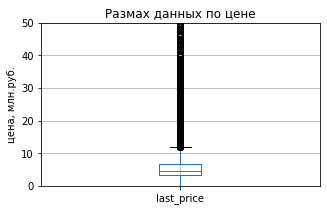

In [42]:
# сейчас нам будет удобнее исследовать данные на предмет выбросов с помощью диаграммы размаха
data.boxplot(column='last_price', figsize=(5,3))
plt.title('Размах данных по цене')
plt.ylabel('цена, млн.руб.')
# зададим лимит поменьше, чтобы было нагляднее
plt.ylim(0,50)
plt.show()

***Примерно выше 12 млн. руб. данные лучше исключить как выбросы, гистограмму будем строить с верхним значением в 12 млн. руб. Минимальную границу оставим как есть, хоть и нет квартир в Питере и ЛО по цене 12 тыс.руб.***

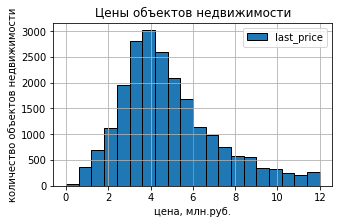

In [43]:
# строим гистограмму зависимости от цены квартир
data['last_price'].hist(bins=20, range=(0.012190,12.0), edgecolor='black', legend=True, figsize=(5,3))
plt.title('Цены объектов недвижимости')
plt.xlabel('цена, млн.руб.')
plt.ylabel('количество объектов недвижимости')
plt.show()

***Судя по гистограмме, самый распространённый вариант стоимости квартир в объявлениях примерно 3,7 - 4,2 млн.руб. Да, в текущих реалиях кажется чем-то из области фантастики, тем более для Питера, однако держим в голове, что данные мы исследуем за 2014-2019 гг. Варианты с ценой более 9 млн.руб. уже гораздо реже встречаются.***

***Судя по описанию данных среднее значение по цене - это 6,5 млн.руб., медианное значение - это 4,6 млн.руб.***

**Количество комнат**

In [44]:
# изучим данные в столбце с количеством комнат
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

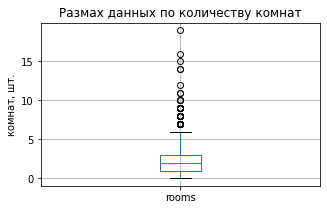

In [45]:
# сейчас нам будет удобнее исследовать данные на предмет выбросов с помощью диаграммы размаха
data.boxplot(column='rooms', figsize=(5,3))
plt.title('Размах данных по количеству комнат')
plt.ylabel('комнат, шт.')
plt.show()

***Оставим для построения гистограммы верхнее значение в 6 комнат в квартирах. Да, есть еще значения в 0 комнат, о которых можно было бы спросить тех, кто выгружал нам данные, т.е. действительно ли квартиры с 0 комнат - это студии? Быстро проверим, есть ли в строках с количеством комнат 0 значения в столбце `studio` значение False.***

In [46]:
#проверим по сводной таблице
data.pivot_table(index = 'rooms', columns = 'studio', values = 'is_apartment', aggfunc = 'count')

studio,False,True
rooms,,
0,59.0,138.0
1,8036.0,11.0
2,7940.0,NaN
3,5814.0,NaN
4,1180.0,NaN
5,326.0,NaN
6,105.0,NaN
7,59.0,NaN
8,12.0,NaN


***Как мы увидели, даже в строках с количеством комнат 0, есть ложные значения в столбце со студиями. Значит, наша гипотеза не подтвердилась, не всегда количество комнат 0 обозначает, что это студия. Можем построить гистограмму с нижней границей в 1 комнату.***

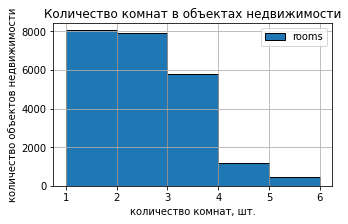

In [47]:
# строим гистограмму зависимости количества объявлений от количества комнат в квартире
data['rooms'].hist(bins=5, range=(1,6), edgecolor='black', legend=True, figsize=(5,3))
plt.title('Количество комнат в объектах недвижимости')
plt.xlabel('количество комнат, шт.')
plt.ylabel('количество объектов недвижимости')
plt.show()

***Мы рассмотрели зависимость количества объявлений от количества комнат в указанных объектах недвижимости. Из выборки исключены квартиры с количеством комнат 0 и более 6. Чаще всего в объявлениях встречаются 1-комнатные, практически также часто 2-комнатные квартиры. Дальше, с увеличением количества комнат уменьшается количество объявлений в продаже. Меньше всего вариантов квартир с количеством комнат больше 4.***

***Среднее и медианное значение, судя по описанию данных, 2 комнаты.***

**Высота потолков**

In [48]:
# изучим данные в столбце с высотой потолков
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

***В столбце `ceiling_height` указана высота потолков 25 м, 32 м, 100 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м.***

In [49]:
# поделим значения столбца, которые больше 20 м, на 10, чтобы восстановить корректность данных
data.loc[data['ceiling_height'] >= 20,'ceiling_height'] = data['ceiling_height'] / 10

In [50]:
# проверим снова описание данных после деления
data['ceiling_height'].describe()

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

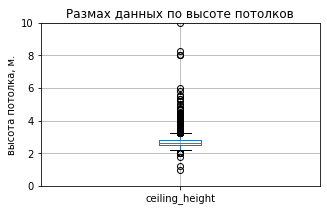

In [51]:
# на всякий случай все равно проверим данные на предмет выбросов с помощью диаграммы размаха
data.boxplot(column='ceiling_height', figsize=(5,3))
plt.title('Размах данных по высоте потолков')
plt.ylabel('высота потолка, м.')
plt.ylim(0,10)
plt.show()

***Ну да, получается, что значения с высотой потолков больше 3 м можно не учитывать при построении гистограммы, как выбросы. Кстати, это касается и потолков с высотой меньше 2,2 м. Посмотрим, что на гистограмме.***

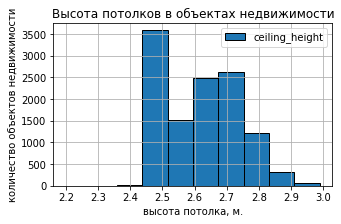

In [52]:
# строим гистограмму
data.query('(ceiling_height > 2) & (ceiling_height < 3)')['ceiling_height'].hist(
    bins=10, 
    edgecolor='black', 
    legend=True, 
    figsize=(5,3)
         )
plt.title('Высота потолков в объектах недвижимости')
plt.xlabel('высота потолка, м.')
plt.ylabel('количество объектов недвижимости')
plt.show()

***Получается, самый часто встречающийся вариант объявлений - это квартиры с потолками примерно 2,5 м. Также достаточно частые варианты - это значения высоты потолков - 2,6 м и 2,7 м. И, начиная со значений в 2,8 м количество таких квартир уменьшается.***

***Что и подтверждается описанием данных, среднее значение составляет 2,7 м, а медианное - 2,6 м.***

**Тип этажа квартиры («первый», «последний», «другой»)**

In [53]:
# изучим данные в добавленном нами столбце с типом этажа квартиры
data['floor_type'].describe()

count      23699
unique         3
top       другой
freq       17446
Name: floor_type, dtype: object

In [54]:
# однако данные в столбце являются категориальными, поэтому показательнее будет посмотреть другим методом
data['floor_type'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_type, dtype: int64

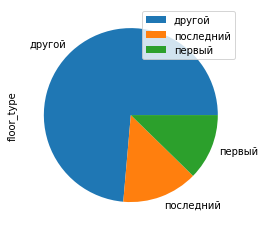

In [55]:
# и для отображения наиболее часто встречающегося значения подойдет, например, круговая диаграмма, т.к. значения всего три
data['floor_type'].value_counts().plot(kind='pie', y='floor_type', legend=True)
plt.show()

***Мы увидели, что наименее популярные объявления - это квартиры на первом и последнем этажах. Визуально 75% от общего количества объявлений - это  квартиры любых других этажей, кроме крайних.***

**Общее количество этажей в доме**

In [56]:
# изучим данные в столбце с количеством этажей
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

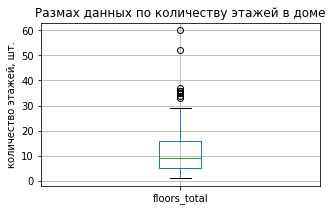

In [57]:
# обязательно проверяем данные на выбросы, потому что максимальное количество этажей - 60, многовато
data.boxplot(column='floors_total', figsize=(5,3))
plt.title('Размах данных по количеству этажей в доме')
plt.ylabel('количество этажей, шт.')
plt.show()

***Из графика мы видим, что присутствуют буквально штучные значения в диапазоне от 50 до 60 этажей. Вероятно, это тоже была случайно сделанная не в том месте запятая, однако это слишком приблизительная гипотеза, чтобы мы могли в данном столбце что-либо править. Поэтому оставляем как есть, исключаем значения более 30 этажей, как выбросы.***

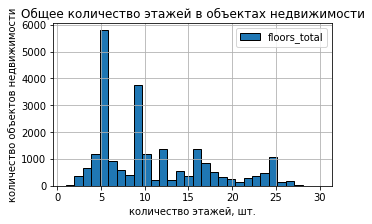

In [58]:
# строим гистограмму зависимости количества объявлений от этажности в доме
data['floors_total'].hist(bins=30, range=(1,30), edgecolor='black', legend=True, figsize=(5,3))
plt.title('Общее количество этажей в объектах недвижимости')
plt.xlabel('количество этажей, шт.')
plt.ylabel('количество объектов недвижимости')
plt.show()

***Мы увидели, что самые распространенные дома в данной выборке объявлений - это 5-этажки. Немного меньше объявлений о продаже квартир в 9-этажных домах. Остальные значения встречаются реже.***

***Среднее и медианное значение по описанию данных - 10 и 9 соответственно.***

**Расстояние до центра города в метрах**

In [59]:
# изучим, как обстоит дело с данными о расстоянии от центра города
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

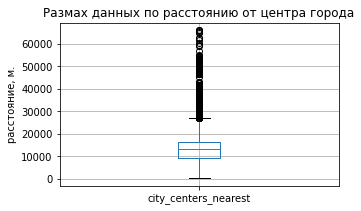

In [60]:
# традиционно проверим по диаграмме размаха
data.boxplot(column='city_centers_nearest', figsize=(5,3))
plt.title('Размах данных по расстоянию от центра города')
plt.ylabel('расстояние, м.')
plt.show()

***Как мы видим, для гистограммы можно взять данные с верхней границей до 28 000 м, остальные значения находятся за границей "нормального размаха".***

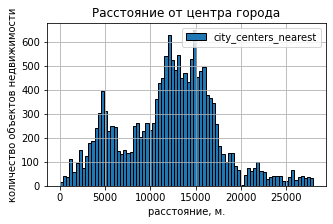

In [61]:
# строим гистограмму связи количества объявлений от расстояния до центра города
data['city_centers_nearest'].hist(bins=80, range=(0,28000), edgecolor='black', legend=True, figsize=(5,3))
plt.title('Расстояние от центра города')
plt.xlabel('расстояние, м.')
plt.ylabel('количество объектов недвижимости')
plt.show()

***Два наиболее часто встречающихся значения - это квартиры с удалённостью примерно 15 и 12 км от центра города. Также достаточно много объявлений со значениями в 13-14 км. И нельзя не отметить выбивающийся "хвостик" количества объявлений со значениями в 5 км от центра.***

***Среднее значение по описанию данных - это примерно 14 км и медианное значение примерно 13 км.***

**Расстояние до ближайшего парка**

In [62]:
# посмотрим, что по описанию данных со значениями расстояния до парков
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

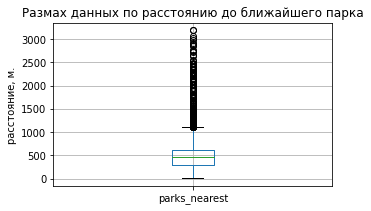

In [63]:
# поищем выбросы
data.boxplot(column='parks_nearest', figsize=(5,3))
plt.title('Размах данных по расстоянию до ближайшего парка')
plt.ylabel('расстояние, м.')
plt.show()

***В пределах диапазона "нормального размаха" оставим значения до 1100 м. С такими значениями построим гистограмму.***

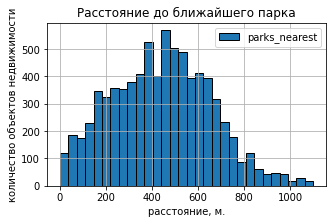

In [64]:
# строим гистограмму связи количества объявлений от расстояния до ближайшего парка
data['parks_nearest'].hist(bins=30, range=(0,1100), edgecolor='black', legend=True, figsize=(5,3))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('расстояние, м.')
plt.ylabel('количество объектов недвижимости')
plt.show()

***Большинство квартир в имеющейся выборке объявлений находятся на удалении примерно в 490 м от парков, а также в 400 м. Достаточно часто встречаются объявления со значениями удалённости в примерно 500 с копейками метров, все остальные уже реже.***

***Среднее значение по описанию данных - как раз 490 м, медианное значение составляет 450 м.***

<div style="background-color:Azure; color:#black; padding:2%">

***ВЫВОД***
    
Наиболее ходовые объекты на рынке недвижимости Питера и ЛО в 2014-2019 гг - это 1- и 2-комнатные квартиры в домах с 5 и 9 этажами с общей площадью примерно в 45 м², с жилой площадью от 18 до 20 м², площадью кухни около 6 м² с высотой потолков от 2,5 до 2,7 м. При этом популярные квартиры НЕ находятся на первых и последних этажах, достаточно удалены от центра города (скорее всего это спальные районы), примерно на расстоянии 12-15 км, однако с парками поблизости, примерно в 500 метрах. Стоимость популярных объектов недвижимости составляет от 3,7 до 4,2 млн. руб.

### Изучение скорости продажи квартир

Значение в столбце `days_exposition`показывает, сколько дней было размещено каждое объявление.
   - Постройте гистограмму.
   - Посчитайте среднее и медиану.
   - В ячейке типа `markdown` опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

In [65]:
# сразу проведем описательный анализ данных
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

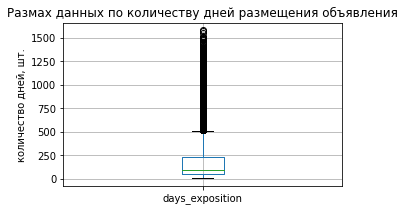

In [66]:
# постараемся избавиться от слишком длительных значений о продаже квартир
data.boxplot(column='days_exposition', figsize=(5,3))
plt.title('Размах данных по количеству дней размещения объявления')
plt.ylabel('количество дней, шт.')
plt.show()

***Сразу проследим, что можем взять более точечную выборку с верхней границей до 500 дней.***

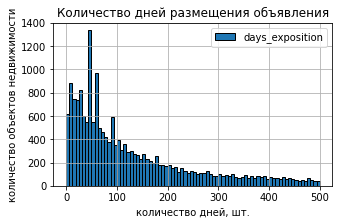

In [67]:
data['days_exposition'].hist(bins=80, range=(0,500),edgecolor='black', legend=True, figsize=(5,3))
plt.title('Количество дней размещения объявления')
plt.xlabel('количество дней, шт.')
plt.ylabel('количество объектов недвижимости')
plt.show()

***На графике отчетливо видны два самых высоких столбика с самыми частыми значениями, для более точного визуала ограничим количество дней значениями до 100 и посмотрим, что получилось.***

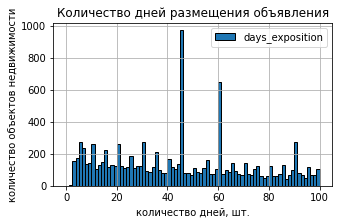

In [68]:
data['days_exposition'].hist(bins=80, range=(0,100),edgecolor='black', legend=True, figsize=(5,3))
plt.title('Количество дней размещения объявления')
plt.xlabel('количество дней, шт.')
plt.ylabel('количество объектов недвижимости')
plt.show()

***Теперь с определенностью можно сказать, что процесс продажи квартиры чаще всего занимает 45 дней, также достаточно часто квартиры продаются за 60 дней размещения объявления.***

<div style="background-color:Azure; color:#black; padding:2%">

***ВЫВОД***
    
Судя по описательной статистике среднее значение дней публикации составляет 180 дней, медианное значение - 95 дней, что меньше практически в два раза, чем среднее. Это значит, что в исходных данных имеется значительное количество выбросов, которые мы отследили с помощью диаграммы размаха, выбрав верхней границей срок до 500 дней. Максимальное значение кажется слишком большим, 1580 дней.

Судя по справке Яндекс.Недвижимость, максимальный срок публикации объявления по продажам квартир и комнат — 365 дней. Возможно, в 2014-2019 гг. срок публикации объявлений был другим. Также по текущим данным есть информация (https://yandex.ru/support/realty/agency/home/add-ads-housing.html#publication-time), что в течение срока от 45 дней объявление считается актуальным (что интересно, в ходе анализа данных мы выяснили, что процесс продажи квартиры чаще всего занимает именно 45 дней). Возможно в данных, которые предоставлены нам, объявления не были сняты с публикации даже после продажи квартиры, поэтому попали к нам в выборку.

Быстрой можно считать продажу в течение 45 дней (это первый квартиль в нашей описательной статистике), долгая продажа получилась более 232 дней (третий квартиль в статистике). Необычайно долгой продажей можно посчитать срок от 232 до 500 дней, потому что значения свыше 500 дней (по диаграмме размаха) мы отсекли как выбросы.

### Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта

Изучите, зависит ли цена от:
    
   - общей площади;
   - жилой площади;
   - площади кухни;
   - количества комнат;
   - этажа, на котором расположена квартира (первый, последний, другой);
   - даты размещения (день недели, месяц, год).
    
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

In [69]:
# либо это можно сделать попарно
print(data['last_price'].corr(data['total_area']))
print(data['last_price'].corr(data['living_area']))
print(data['last_price'].corr(data['kitchen_area']))
print(data['last_price'].corr(data['rooms']))

0.6536750579657243
0.5664915336952652
0.5198690130216389
0.3633428499648948


In [70]:
# либо список параметров, нужных для сравнения просто передать
params = ['last_price',
    'total_area',
    'living_area',
    'kitchen_area'
         ]
display(data[params].corr())

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.653675,0.566492,0.519869
total_area,0.653675,1.000000,0.939537,0.609121
living_area,0.566492,0.939537,1.000000,0.428674
kitchen_area,0.519869,0.609121,0.428674,1.000000


***По матрице корреляции в первую очередь мы видим прямопропорциональную зависимость стоимости квартиры и общей площади (0.653675), а также достаточно сильную связь цены и жилой площади (0.566492), и наконец зависимость между стоимостью квартиры и площадью кухни (0.519869).***

***Построим диаграммы рассеяния попарно для стоимости квартиры с указанными в задании величинами.***

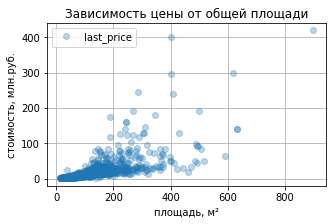

In [71]:
# исследуем связь цены квартиры от общей площади с помощью диаграммы рассеяния
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 3), alpha = 0.3)
plt.title('Зависимость цены от общей площади')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, млн.руб.')
plt.show()

***Как мы видим по диаграмме - прямая связь между ценой квартиры и общей площадью прослеживается очень четко! Что логично - чем больше площадь квартиры, тем квартира дороже.***

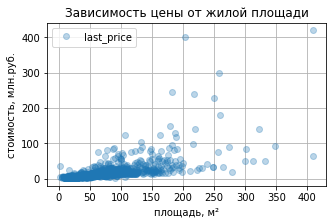

In [72]:
# исследуем связь цены квартиры от жилой площади с помощью диаграммы рассеяния
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 3), alpha = 0.3)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, млн.руб.')
plt.show()

***Практически также, как и в прежней паре параметров - и жилая площадь квартиры влияет на ее стоимость, визуально связь чуть слабее. Тоже логично - чем больше жилая площадь квартиры, тем квартира дороже.***

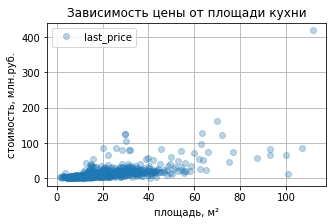

In [73]:
# исследуем связь цены квартиры от площади кухни с помощью диаграммы рассеяния
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 3), alpha = 0.3)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, млн.руб.')
plt.show()

***Связь также есть, но уже визуально гораздо слабее, чем в предыдущих двух парах. На увеличение стоимости квартиры немного влияет метраж в принципе, в данном случае метраж кухни.***

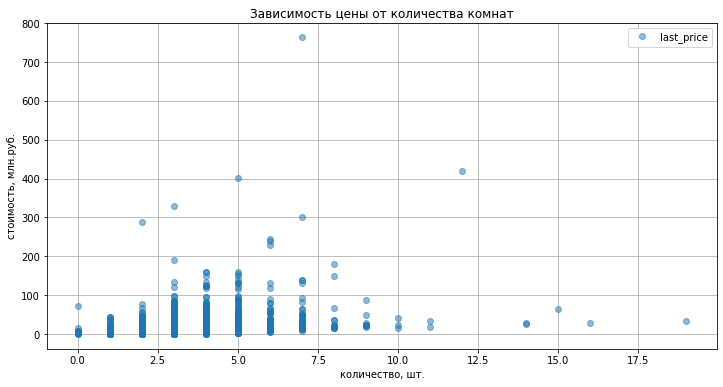

In [74]:
# теперь исследуем связь цены квартиры от количества комнат с помощью диаграммы рассеяния
data.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('количество, шт.')
plt.ylabel('стоимость, млн.руб.')
plt.show()

***Из графика мы видим некоторую связь, да. Однако "хвост" графика идет вверх до достижения значения в 5 комнат, а затем начинает снижаться. Площадь комнат может быть разная, могут быть квартиры с 2 комнатами больше по площади, чем с 6 комнатами.***

In [75]:
# теперь исследуем отдельно связь между пропущенным ранее типом этажа и стоимость квартиры, сводная таблица нам в помощь
data.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean'])

,median,mean
,last_price,last_price
floor_type,,
другой,4.85,6.675444
первый,3.90,4.803560
последний,4.30,7.361025


***Из таблички сразу видим, что стоимость квартир реально отличается в зависимости от типа этажа. Объявления о продаже квартир на первом этаже в представленной выборке являются самыми недорогими, чуть дороже квартиры на последних этажах. Однако квартиры на крайних этажах в любом случае уступают по цене другим этажам.***

***Подтвердим нашу гипотезу с помощью графика.***

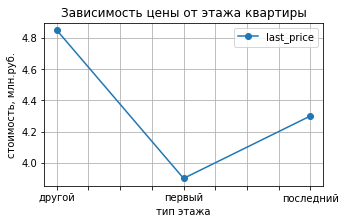

In [76]:
data.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean']).plot(
    y='median',
    grid=True,
    style='o-',
    figsize=(5, 3)
)
plt.title('Зависимость цены от этажа квартиры')
plt.xlabel('тип этажа')
plt.ylabel('стоимость, млн.руб.')
plt.show()

***Теперь интересно проследить, есть ли взаимосвязь между стоимостью квартиры и датой размещения объявления, отдельно по дню, месяцу и году. Возможно, здесь нам подойдет столбчатая диаграмма.***

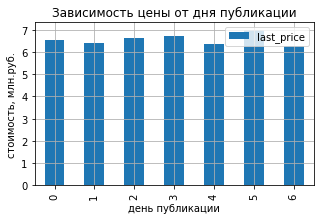

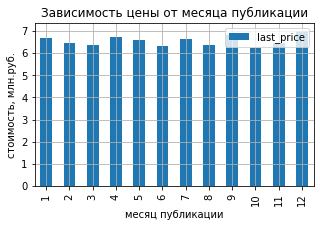

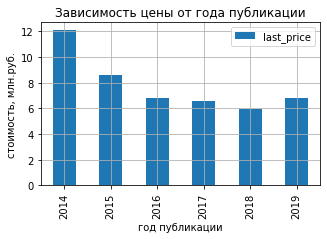

In [77]:
# посмотрим зависимость цены квартиры от дня размещения объявления
data.pivot_table(index='weekday_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 3), kind='bar')
plt.title('Зависимость цены от дня публикации')
plt.xlabel('день публикации')
plt.ylabel('стоимость, млн.руб.')
plt.show()

# посмотрим зависимость цены квартиры от месяца размещения объявления
data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 3), kind='bar')
plt.title('Зависимость цены от месяца публикации')
plt.xlabel('месяц публикации')
plt.ylabel('стоимость, млн.руб.')
plt.show()

# посмотрим зависимость цены квартиры от года размещения объявления
data.pivot_table(index='year_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 3), kind='bar')
plt.title('Зависимость цены от года публикации')
plt.xlabel('год публикации')
plt.ylabel('стоимость, млн.руб.')
plt.show()

***Очень явно видно, что никакой зависимости от дня и месяца публикации объявления нет. Обращает на себя наше внимание последний график, всё-таки год размещения объявления повлиял на стоимость квартиры. В принципе да, цены с течением времени могут меняться, однако по логике можно было бы предположить, что в сторону увеличения стоимости, а у нас получилось как будто бы наоборот.***

***Скорее всего на это влияет и то,что было размещено просто меньше вариантов более дорогих квартир, так как они стали менее ходовыми с течением времени.***

<div style="background-color:Azure; color:#black; padding:2%">

***ВЫВОД***
    
Мы проследили наглядно, что среди всех указанных параметров на стоимость квартиры влияют сильнее всего те, которые связаны с площадью объекта недвижимости (это общая/ жилая площадь и немного площадь кухни), т.е. чем больше площадь, тем дороже объект; а также есть связь с тем, на каком этаже расположена квартира, т.е. наименее дорогие квартиры находятся на первых и последних этажах, однако стоимость выше у квартир других этажей.
    
Также на самом последнем графике мы отследили взаимосвязь стоимости квартиры от года размещения объявления, с течением времени стоимость поползла вниз, т.е. по сравнению с 2014 годом стоимость квартир к 2019 году достаточно заметно уменьшилась.

### Подсчет средней цены одного м² в 10 населённых пунктах с наибольшим числом объявлений

Постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [78]:
# сделаем сводную таблицу, сгруппировав 10 самых популярных объявлений и добавив среднюю цену за м²
round(data.groupby('locality_name').agg({'balcony':'count', 'price_per_m2':'mean'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10))

,balcony,price_per_m2
locality_name,,
Санкт-Петербург,15721,114849.0
поселок Мурино,556,85682.0
поселок Шушары,440,78677.0
Всеволожск,398,68654.0
Пушкин,369,103126.0
Колпино,338,75425.0
поселок Парголово,327,90176.0
Гатчина,307,68746.0
деревня Кудрово,299,92474.0


<div style="background-color:Azure; color:#black; padding:2%">

***ВЫВОД***
    
Два самых дорогих по цене за квадратный метр (больше 100 тыс. руб.) населённых пункта - это Санкт-Петербург (114 849 руб. за м²), что ожидаемо, это самый крупный город в представленной выборке, а также г. Пушкин (103 126 руб. за м²), скорее всего потому что город считается крупным туристическим и историческим центром.
    
Наименее дорогим населённым пунктом по цене за квардратный метр оказался Выборг (58 142 руб. за м²).

### Подсчёт средней стоимости квартир в Санкт-Петербурге на разном удалении от центра.

Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

In [80]:
# выделим квартиры только в Санкт-Петербурге
flats_spb = data.query('locality_name == "Санкт-Петербург"')

In [81]:
# посчитаем, сколько таких объявлений только по г. Санкт-Петербург
len(flats_spb)

15721

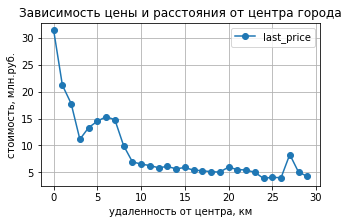

In [82]:
# построим график изменения средней цены квартиры по удаленности от центра города
flats_spb.pivot_table(index='city_centers_km', values='last_price').plot(
    style='o-',
    grid=True,
    figsize=(5, 3)
)
plt.title('Зависимость цены и расстояния от центра города')
plt.xlabel('удаленность от центра, км')
plt.ylabel('стоимость, млн.руб.')
plt.show()

<div style="background-color:Azure; color:#black; padding:2%">

***ВЫВОД***
    
Что и требовалось ожидать, с уменьшением расстояния до центра города увеличивается стоимость квартир, т.е. чем ближе к центру Питера, тем квартиры дороже.
Есть незначительный "хвост" в удаленных от центра квартирах, возможно это зависит от застройщика, либо это какая-то элитная недвижимость, например, с собственным парком или прудом.

## Общий вывод

### Выводы для построения автоматизированной системы определения рыночной стоимости

1. **В ходе исследования мы выяснили для начала "портрет" самого ходового объекта недвижимости на рынке** в Питере и ЛО (по данным за 2014 - 2019 гг) - это квартиры с небольшим количеством комнат (1,2) в пяти- и девятиэтажных домах, самая популярная общая площадь квартир примерно 45 м², жилая - примерно от 18 до 20 м², площадь кухни около 6 м² и высота потолков от 2,5 м до 2,7 м. Не очень популярны квартиры на первых и последних этажах, чем удалённее от центра города квартира (примерно в 12-15 м) и ближе к парк (примерно в 500 м), тем она популярнее.
Стоимость самых ходовых объектов недвижимости составляет от 3,7 до 4,2 млн. руб.

2. В первую очередь, **сильнее всего влияют на стоимость квартиры параметры, связанные с площадью объекта** (это жилая и общая площадь квартиры), а именно чем больше площадь квартиры, тем дороже. Положительная взаимосвязь есть и от площади кухни, что также стоит отметить. Также на стоимость влияет количество комнат, до значения в 5 комнат стоимость квартиры растёт, но после 5 и дальше, стоимость начинает снижаться. Плюс квартиры на первом и последнем атажах в домах дешевле, чем квартиры на других этажах. При этом более дорогими являются квартиры, которые находят ближе к центру города.

3. **Согласно проведённому анализу данных как правило процесс продажи квартиры на сервисе Яндекс. Недвижимость занимает от 45 до 232 дней,** что интересно судя по по текущим данным сервиса есть информация (https://yandex.ru/support/realty/agency/home/add-ads-housing.html#publication-time), что в течение срока от 45 дней объявление считается актуальным, максимальный срок публикации объявления по продажам квартир и комнат — 365 дней. Возможно, в 2014-2019 гг. срок публикации объявлений был другим.

4. **Самая высокая средняя стоимость квадратного метра у квартир** в г. Санкт-Петербург (114 849 руб. за м²) и у квартир в г. Пушкин (103 126 руб. за м²), а также в случае с Санкт-Петербургом чем ближе к центру города расположена квартира, тем выше её стоимость.

### Выводы после исследовательского анализа данных

1. В ходе аналитики мы проследили, насколько важно сразу проверять датасет на наличие пропусков, некорректных типов данных, а также явных и неявных дубликатов. Далее уже принимали решение, оставлять пропуски нетронутыми (например, в столбце `locality_name` - категориальный тип данных, не заменить ни средними, ни медианными значениями), либо производить адекватную замену пропущенных данных (например, в столбце `balcony` логично предположили, что если не указано количество балконов, то их в квартире не имеется и можно заменить пропуски на ноль).

2. Мы снова задумались о причинах появления пропусков в данных - это человеческий фактор (если данные заполняются вручную), технические ошибки при сборе и переносе данных, а также ошибки при выгрузке и объединения различных данных (например, пропуски в наименованиях населённых пунктов, когда не подтянулись картографические данные).

3. Очень верным решением было проверять данные на наличие выбросов перед составлением гистограмм (в нашем случае, мы проверяли с помощью диаграмм размаха), иначе результаты получились бы искажёнными. Мы подтвердили это, когда была составлена матрица корреляции (до устранения выбросов и после - данные получились отличными друг от друга).

4. В процессе исследования мы использовали различные типы графиков и диаграмм (круговая, гистограмма, размаха, столбчатая) в зависимости от задачи, которая перед нами стояла и выяснили, что в некоторых случаях нагляднее будет применить круговую диаграмму (как в случае с данными из столбца с типом этажа `floor_type`), а в некоторых случаях мы быстрее поймем, что зависимость отсутствует на столбчатой диаграмме (как с задачей по анализу зависимости цены от даты публикации объявления).